In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [2]:
import numpy as np

def mmq(x, y):
    x = np.insert(x, 0, 1, axis=1)
    x_t = np.transpose(x)
    xt_x = np.dot(x_t, x)
    inverse_xt_x = np.linalg.inv(xt_x)
    xt_y = np.dot(x_t, y)
    return np.dot(inverse_xt_x, xt_y)

In [3]:
dados = pd.read_csv("vivareal-boaviagem-limpo.csv")

In [4]:
dados.head()

,título,preço,condomínio,iptu,área,quartos,banheiros,vagas,url,latitude,longitude
0,"Apartamento na Rua dos Navegantes, 1033, Boa V...",659000.0,1200.0,3700.000000,151.0,3.0,2.0,2.0,https://www.vivareal.com.br/imovel/apartamento...,-8.123251,-34.897370
1,"Apartamento na Rua Ministro Nelsom Hungria, 15...",270000.0,744.0,816.737391,91.0,3.0,3.0,1.0,https://www.vivareal.com.br/imovel/apartamento...,-8.110229,-34.897039
2,Apartamento na Rua Professor Augusto Lins e Si...,510000.0,450.0,1200.000000,70.0,2.0,2.0,1.0,https://www.vivareal.com.br/imovel/apartamento...,-8.144108,-34.907494
3,"Apartamento na Rua Luiz Pimentel, 77, Boa Viag...",350000.0,550.0,2000.000000,65.0,2.0,1.0,1.0,https://www.vivareal.com.br/imovel/apartamento...,-8.137637,-34.905575
4,"Apartamento na Rua João Cardoso Aíres, 305, Bo...",570000.0,900.0,987.264978,110.0,3.0,4.0,2.0,https://www.vivareal.com.br/imovel/apartamento...,-8.142826,-34.907311


In [5]:
X = dados[["condomínio", "iptu","área", "quartos", "banheiros", "vagas"]]
Y = dados["preço"]

In [6]:
betas = mmq(X.values, Y.values)

In [7]:
import statsmodels.api as sm

c:\users\gileno\workspace\python-pandas\venv\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [8]:
model = sm.OLS(Y, X)
results = model.fit()

In [9]:
predict = model.predict(results.params, X)

In [10]:
predict = pd.DataFrame(predict, columns=['Y_HAT'])

In [11]:
predict['Y'] = Y

In [12]:
predict

,Y_HAT,Y
0,9.495039e+05,659000.0
1,4.592778e+05,270000.0
2,3.910043e+05,510000.0
3,3.712636e+05,350000.0
4,7.841414e+05,570000.0
5,3.578826e+05,350000.0
6,6.190427e+05,550000.0
7,8.221511e+05,500000.0
8,6.056532e+05,595000.0
9,4.398710e+05,370000.0


In [13]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  preço   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     1907.
Date:                Sun, 20 May 2018   Prob (F-statistic):               0.00
Time:                        14:43:38   Log-Likelihood:                -11316.
No. Observations:                 842   AIC:                         2.264e+04
Df Residuals:                     836   BIC:                         2.267e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
condomínio   268.1556     24.343     11.016      0.000     220.375     315.936
iptu           8.8587      5.469      1.620      0.106      -1.876      19.594
área        3297.4699    242.143     13.618      0.000    2822.190    3772.750
quartos    -1.136e+05   9115.964    -12.459      0.000   -1.31e+05   -9.57e+04
banheiros   3.716e+04   6059.793      6.132      0.000    2.53e+04    4.91e+04
vagas       1.817e+05   1.34e+04     13.561      0.000    1.55e+05    2.08e+05
==============================================================================
Omnibus:                      489.414   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10461.550
Skew:                           2.196   Prob(JB):                         0.00
Kurtosis:                      19.700   Cond. No.                     3.75e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.75e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

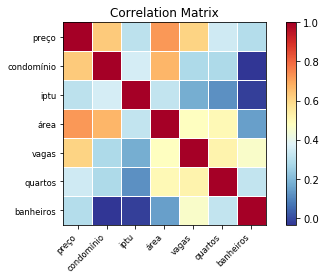

In [15]:
df = dados[["preço", "condomínio", "iptu", "área", "vagas", "quartos", "banheiros"]]
corr_matrix = np.corrcoef(df.T)
sm.graphics.plot_corr(corr_matrix, xnames=list(df.columns.values))
plt.show()